In [121]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats

# Load the dataset
file_path = r'C:\Users\user\AppData\Local\Temp\87ebd377-b028-445b-9c65-72a3b26868d0_Clustering.zip.8d0\Clustering\EastWestAirlines.xlsx'
df = pd.read_excel(file_path, sheet_name='data')

# Drop non-numeric columns if they are not needed for clustering
df_numerical = df.drop(columns=['ID#', 'Award?'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_numerical_imputed = pd.DataFrame(imputer.fit_transform(df_numerical), columns=df_numerical.columns)

# Remove outliers using Z-score
z_scores = np.abs(stats.zscore(df_numerical_imputed))
df_numerical_cleaned = df_numerical_imputed[(z_scores < 3).all(axis=1)]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_numerical_cleaned)

# Convert the scaled features back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=df_numerical_cleaned.columns)


             Balance   Qual_miles    cc1_miles  cc2_miles  cc3_miles  \
count    3630.000000  3630.000000  3630.000000     3630.0     3630.0   
mean    60519.392562    39.584573     1.997245        1.0        1.0   
std     61882.862343   249.199005     1.319875        0.0        0.0   
min         0.000000     0.000000     1.000000        1.0        1.0   
25%     17481.000000     0.000000     1.000000        1.0        1.0   
50%     39220.000000     0.000000     1.000000        1.0        1.0   
75%     82121.500000     0.000000     3.000000        1.0        1.0   
max    370941.000000  2454.000000     5.000000        1.0        1.0   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count   3630.000000  3630.000000        3630.000000      3630.000000   
mean   14299.180716    10.464187         255.907438         0.785124   
std    18134.266531     8.251370         636.954758         1.818614   
min        0.000000     0.000000           0.000000         0.0

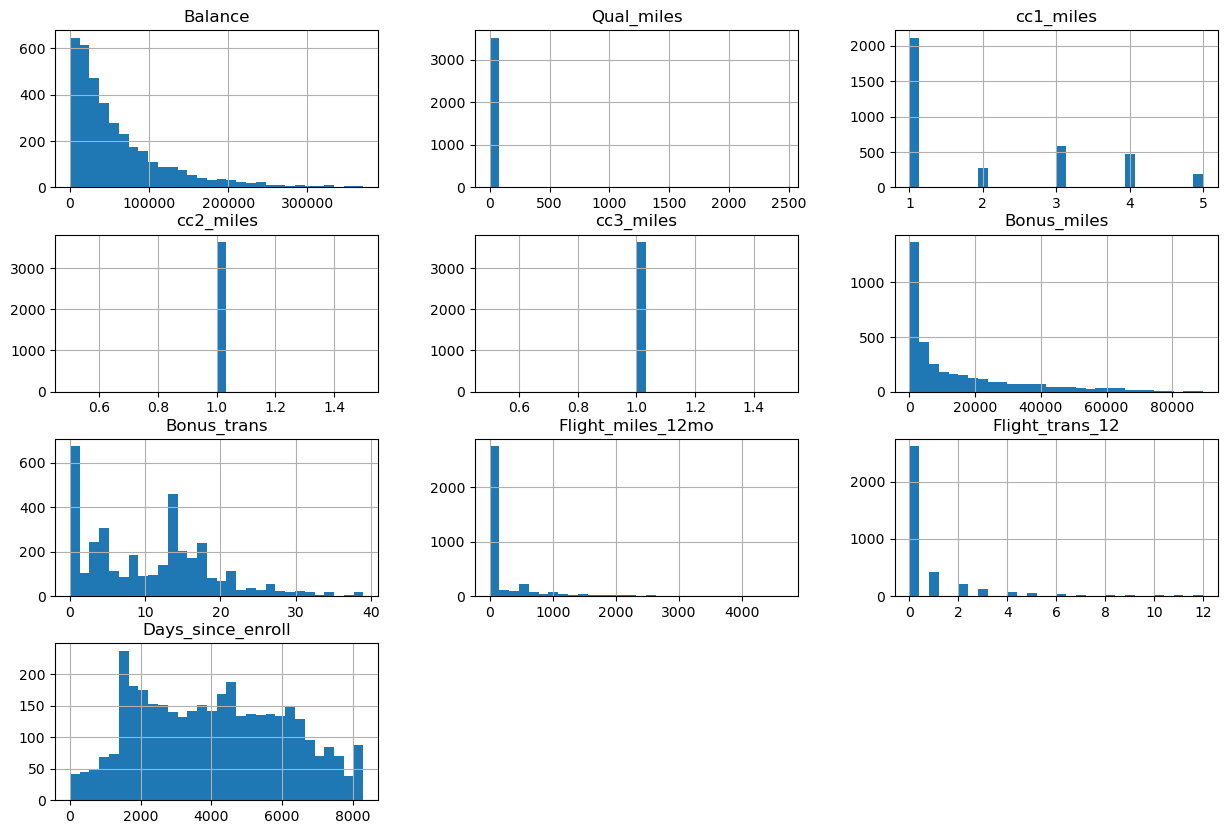

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


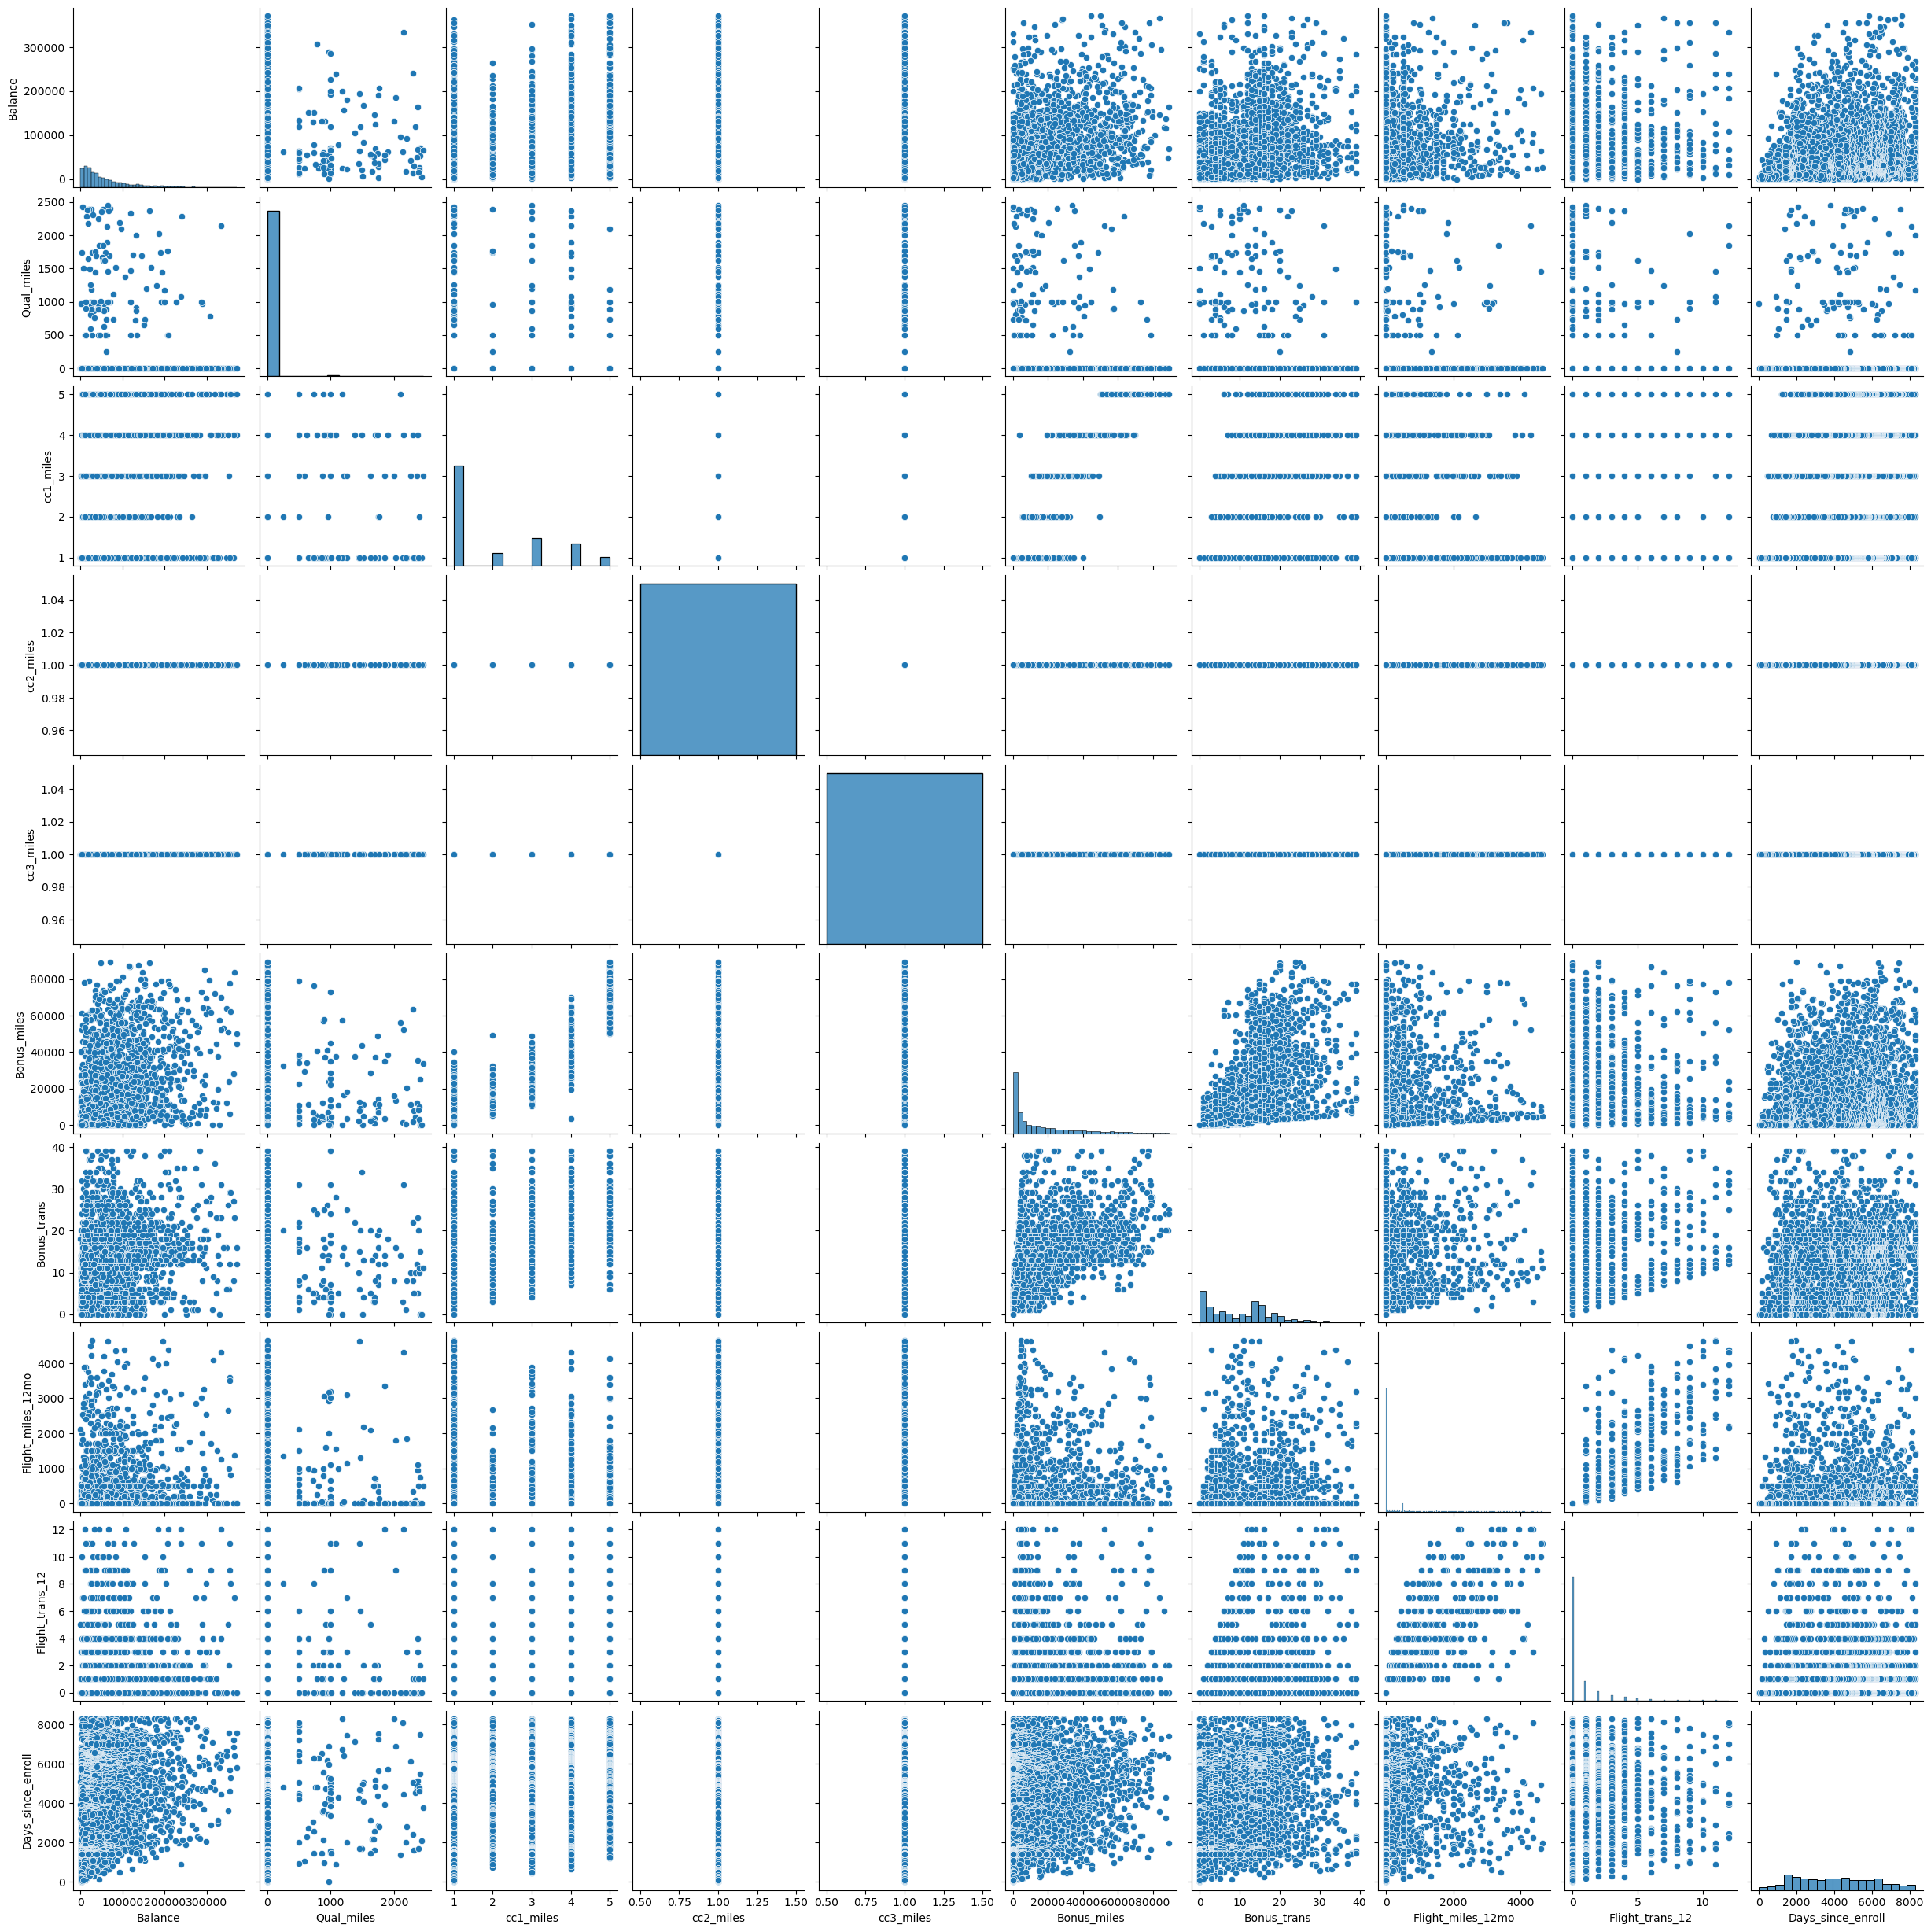

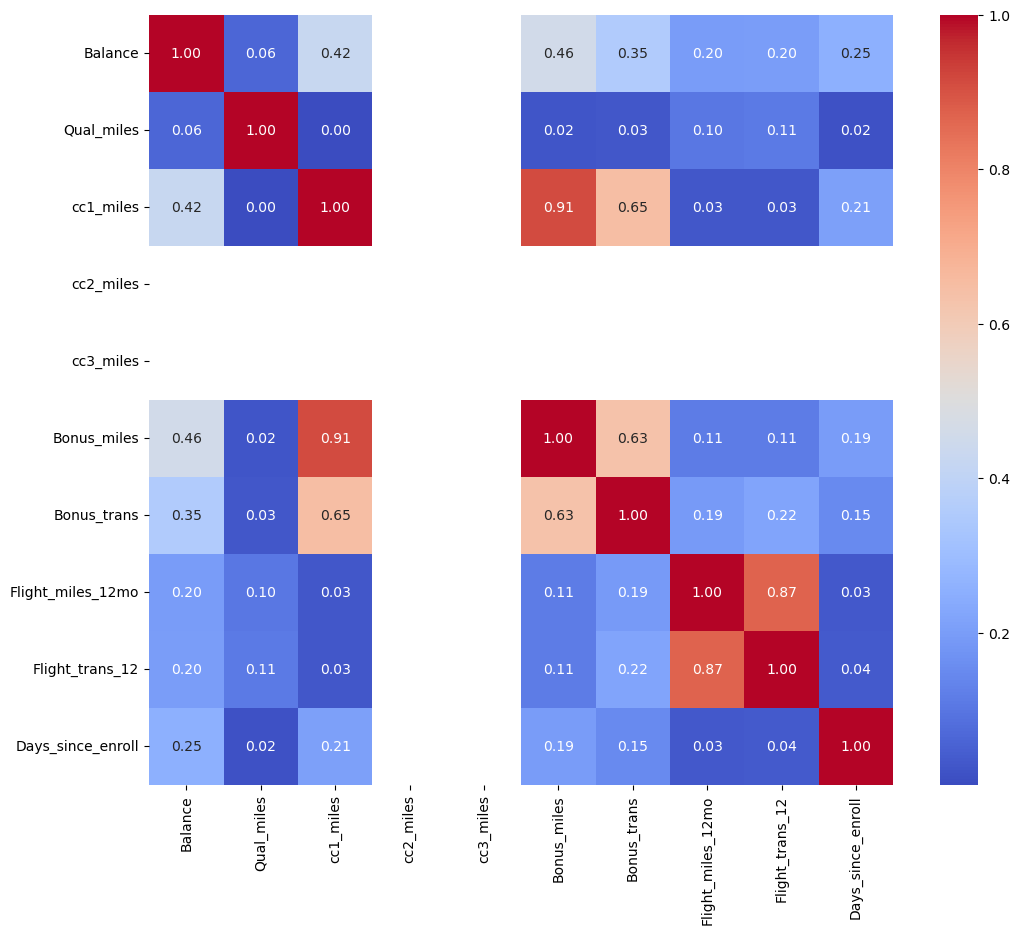

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA: Summary statistics
print(df_numerical_cleaned.describe())

# EDA: Distribution of features
df_numerical_cleaned.hist(bins=30, figsize=(15, 10))
plt.show()

# EDA: Pair plot
sns.pairplot(df_numerical_cleaned)
plt.show()

# EDA: Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_numerical_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [123]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# K-Means Clustering
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    return labels, score

# Hierarchical Clustering
def hierarchical_clustering(data, n_clusters, linkage_method='ward'):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    labels = hierarchical.fit_predict(data)
    score = silhouette_score(data, labels)
    return labels, score

# DBSCAN Clustering
def dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    # DBSCAN might return noise points (-1), handle this case
    if len(set(labels)) > 1:
        score = silhouette_score(data, labels)
    else:
        score = -1  # Single cluster or noise
    return labels, score

# K-Means Experimentation
kmeans_labels, kmeans_score = kmeans_clustering(scaled_df, n_clusters=3)

# Hierarchical Clustering Experimentation
hierarchical_labels, hierarchical_score = hierarchical_clustering(scaled_df, n_clusters=3)

# DBSCAN Experimentation
dbscan_labels, dbscan_score = dbscan_clustering(scaled_df, eps=0.5, min_samples=5)

print(f'K-Means Silhouette Score: {kmeans_score:.3f}')
print(f'Hierarchical Silhouette Score: {hierarchical_score:.3f}')
print(f'DBSCAN Silhouette Score: {dbscan_score:.3f}')


K-Means Silhouette Score: 0.350
Hierarchical Silhouette Score: 0.347
DBSCAN Silhouette Score: -0.297


In [124]:
# Add cluster labels to the DataFrame for analysis
df_numerical_cleaned['KMeans_Cluster'] = kmeans_labels
df_numerical_cleaned['Hierarchical_Cluster'] = hierarchical_labels
df_numerical_cleaned['DBSCAN_Cluster'] = dbscan_labels

# Analyze each cluster
print("K-Means Cluster Analysis:")
print(df_numerical_cleaned.groupby('KMeans_Cluster').mean())

print("Hierarchical Cluster Analysis:")
print(df_numerical_cleaned.groupby('Hierarchical_Cluster').mean())

print("DBSCAN Cluster Analysis:")
print(df_numerical_cleaned.groupby('DBSCAN_Cluster').mean())


K-Means Cluster Analysis:
                     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                              
0               36755.204007   29.862933   1.146175        1.0        1.0   
1               97897.225410  157.127049   2.020492        1.0        1.0   
2               96709.280672   33.423529   3.563025        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0                3663.948087     6.030965          98.770036         0.352914   
1               19236.081967    16.110656        2217.303279         6.274590   
2               32912.934454    17.487395         143.716807         0.457143   

                Days_since_enroll  Hierarchical_Cluster  DBSCAN_Cluster  
KMeans_Cluster                                                           
0                     3666.077869 

C:\Users\user\AppData\Local\Temp\ipykernel_16660\3492752673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical_cleaned['KMeans_Cluster'] = kmeans_labels
C:\Users\user\AppData\Local\Temp\ipykernel_16660\3492752673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical_cleaned['Hierarchical_Cluster'] = hierarchical_labels
C:\Users\user\AppData\Local\Temp\ipykernel_16660\3492752673.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

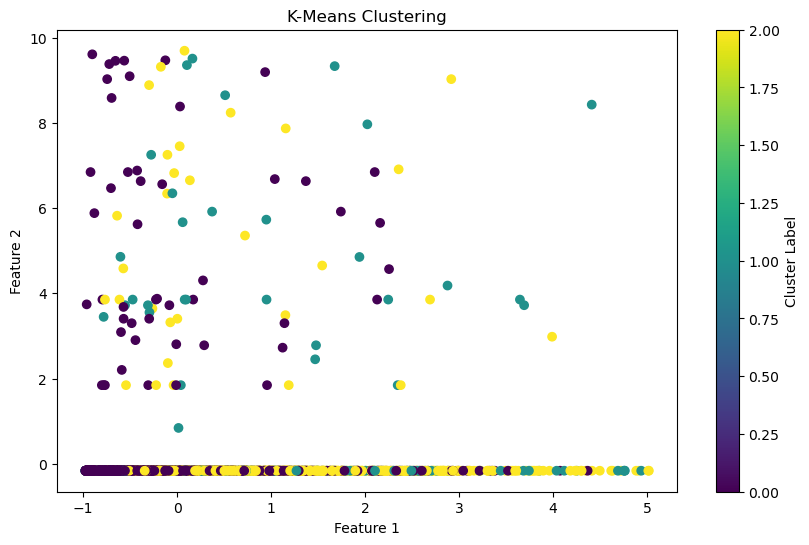

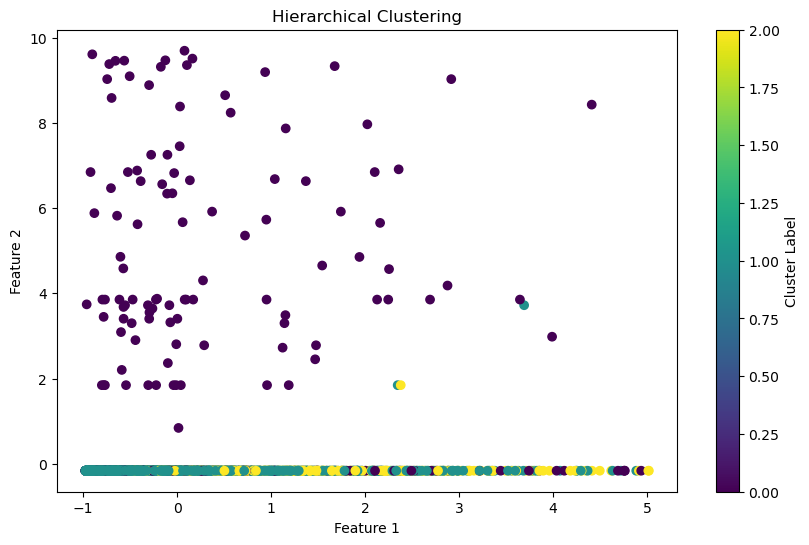

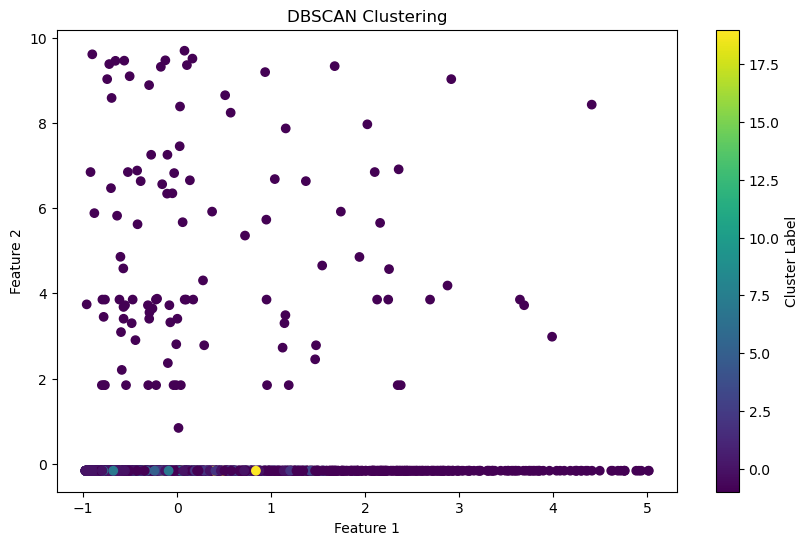

In [125]:
# Function to plot clusters in 2D
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Visualization for K-Means Clustering
plot_clusters(scaled_df.values, kmeans_labels, 'K-Means Clustering')

# Visualization for Hierarchical Clustering
plot_clusters(scaled_df.values, hierarchical_labels, 'Hierarchical Clustering')

# Visualization for DBSCAN Clustering
plot_clusters(scaled_df.values, dbscan_labels, 'DBSCAN Clustering')


In [ ]:
K-Means Cluster Analysis
Cluster Characteristics
Cluster 0:

Balance: $36,755
Qual_miles: 30
cc1_miles: 1.15
cc2_miles: 1.00
cc3_miles: 1.00
Bonus_miles: 3,664
Bonus_trans: 6.03
Flight_miles_12mo: 99
Flight_trans_12: 0.35
Days_since_enroll: 3,666
Cluster 1:

Balance: $97,897
Qual_miles: 157
cc1_miles: 2.02
cc2_miles: 1.00
cc3_miles: 1.00
Bonus_miles: 19,236
Bonus_trans: 16.11
Flight_miles_12mo: 2,217
Flight_trans_12: 6.27
Days_since_enroll: 4,318
Cluster 2:

Balance: $96,709
Qual_miles: 33
cc1_miles: 3.56
cc2_miles: 1.00
cc3_miles: 1.00
Bonus_miles: 32,913
Bonus_trans: 17.49
Flight_miles_12mo: 144
Flight_trans_12: 0.46
Days_since_enroll: 4,740
Interpretation
Cluster 0 appears to have customers with moderate balance and lower miles, both qualifying and bonus. They have been enrolled for a relatively moderate amount of time.
Cluster 1 represents high-balance customers with substantial miles and higher flight activity. They have been enrolled for a longer time.
Cluster 2 consists of customers with high balance and bonus miles but lower flight miles. They have been enrolled for the longest period among the clusters.
Hierarchical Cluster Analysis
Cluster Characteristics
Cluster 0:

Balance: $79,125
Qual_miles: 372
cc1_miles: 1.92
cc2_miles: 1.00
cc3_miles: 1.00
Bonus_miles: 16,130
Bonus_trans: 13.36
Flight_miles_12mo: 1,587
Flight_trans_12: 4.60
Days_since_enroll: 4,144
Cluster 1:

Balance: $47,356
Qual_miles: 1
cc1_miles: 1.49
cc2_miles: 1.00
cc3_miles: 1.00
Bonus_miles: 6,666
Bonus_trans: 8.29
Flight_miles_12mo: 82
Flight_trans_12: 0.29
Days_since_enroll: 3,871
Cluster 2:

Balance: $105,751
Qual_miles: 1
cc1_miles: 4.26
cc2_miles: 1.00
cc3_miles: 1.00
Bonus_miles: 46,113
Bonus_trans: 18.06
Flight_miles_12mo: 176
Flight_trans_12: 0.56
Days_since_enroll: 4,835
Interpretation
Cluster 0 comprises customers with high balances and high qualifying miles, indicating high-value customers who are active.
Cluster 1 includes customers with moderate balance and low flight activity, suggesting they are less engaged.
Cluster 2 contains the highest balance customers with significant bonus miles and the longest tenure.
DBSCAN Cluster Analysis
Cluster Characteristics
Cluster -1 (Noise):

Balance: $100,256
Qual_miles: 106
cc1_miles: 2.60
cc2_miles: 1.00
cc3_miles: 1.00
Bonus_miles: 24,978
Bonus_trans: 15.16
Flight_miles_12mo: 646
Flight_trans_12: 1.96
Days_since_enroll: 4,535
Cluster 0 to Cluster 19:

These clusters contain a variety of characteristics ranging from very high balances to low balances, minimal or high bonus miles, and varying flight miles and transactions.
Interpretation
Cluster -1 (Noise) indicates customers with high balances and substantial bonus miles who are not fitting into the regular clusters, possibly indicating anomalies or outliers.
Other clusters vary significantly, suggesting diverse customer profiles with different balances, miles, and activity levels.
Summary of Insights
K-Means Clusters: Identifies customers based on their balance, miles, and activity. Useful for targeting different segments such as high-value long-term customers versus more recent or lower-value customers.
Hierarchical Clustering: Provides a view of customer segments based on overall activity and balance, emphasizing high-value and low-value segments.
DBSCAN: Detects noise and anomalies, revealing diverse profiles with varying balances and activity levels.